# Metrics and Plots for the trained models

This notebook aims to viz results from metrics that were already saved in `results/scores_tables`

> [!NOTE]  
> normalization only applied to create protein embeddings

This notebook shows only protein embeddings performance along with gene expreession, as they are super competitive

## Viz

In [195]:
version='v2.11'
norm='minmax'

In [196]:
import pandas as pd
import sys,os
sys.path.append(os.path.abspath('../../src/ml'))


from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer



In [197]:
avg_df=pd.read_csv('../../results/score_tables/scores_avg_seeds.csv')
all_df=pd.read_csv('../../results/score_tables/scores_all_seeds.csv')

In [ ]:
input_data=[
 'gene_expression',

 'Complex_protein_embeddings',
 'RGCN_protein_embeddings',
 'weighted_RGCN_protein_embeddings',
 'GraphSAGE_protein_embeddings',
 'GAT_protein_embeddings',
#  'concatenated_protein_embeddings',

#  'Complex_sample_embeddings',
#  'RGCN_sample_embeddings',
#  'weighted_RGCN_sample_embeddings',
#  'GraphSAGE_sample_embeddings',
#  'GAT_sample_embeddings'
#  'concatenated_sample_embeddings'
]

In [199]:
df=avg_df
filtered_results=df[
        (df['input']=='gene_expression') 
        | ((df['version']==version) & (df['normalization']==norm))
        | (
            (norm != 'none')
            & df['input'].isin([
                'RGCN_sample_embeddings',
                'Complex_sample_embeddings',
                'concatenated_sample_embeddings'
            ])
            & (df['version']==version)
        )
]


For better foucsed results, consider only non pytorch mlp models and CompEx and RGCN only (the others gnns are not done yet)

So run this if metrics files contatin them

In [200]:
filtered_results=filtered_results[filtered_results['model']!='pytorch_mlp']
# -- only input in input_data
filtered_results=filtered_results[filtered_results['input'].isin(input_data)]

In [201]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
40,random_forest,Complex_protein_embeddings,minmax,v2.11,0.801794,0.902229,0.976316,0.937127,0.691481,0.970335,0.991747,0.077445
50,random_forest,GAT_protein_embeddings,minmax,v2.11,0.849163,0.926919,0.971053,0.947129,0.763262,0.966507,0.990175,0.075870
64,random_forest,GraphSAGE_protein_embeddings,minmax,v2.11,0.763517,0.884900,0.981579,0.929543,0.643525,0.956938,0.988257,0.091781
80,random_forest,RGCN_protein_embeddings,minmax,v2.11,0.726435,0.867022,0.971053,0.915562,0.569952,0.903110,0.963238,0.100980
101,random_forest,gene_expression,none,no version,0.701914,0.853740,0.994737,0.918703,0.570990,0.967823,0.990010,0.091307
103,random_forest,weighted_RGCN_protein_embeddings,minmax,v2.11,0.790072,0.896011,0.971053,0.931387,0.675128,0.966029,0.990092,0.082063
119,sklearn_mlp,Complex_protein_embeddings,minmax,v2.11,0.913517,0.957654,0.981579,0.968879,0.860892,0.981579,0.994723,0.041194
129,sklearn_mlp,GAT_protein_embeddings,minmax,v2.11,0.864713,0.934462,0.965789,0.949459,0.767973,0.959091,0.988488,0.068107
143,sklearn_mlp,GraphSAGE_protein_embeddings,minmax,v2.11,0.850957,0.932244,0.947368,0.939182,0.715389,0.968900,0.992123,0.067452
159,sklearn_mlp,RGCN_protein_embeddings,minmax,v2.11,0.500000,0.775510,1.000000,0.873563,0.000000,0.500000,0.775510,0.223697


### 1. grouped bar plots

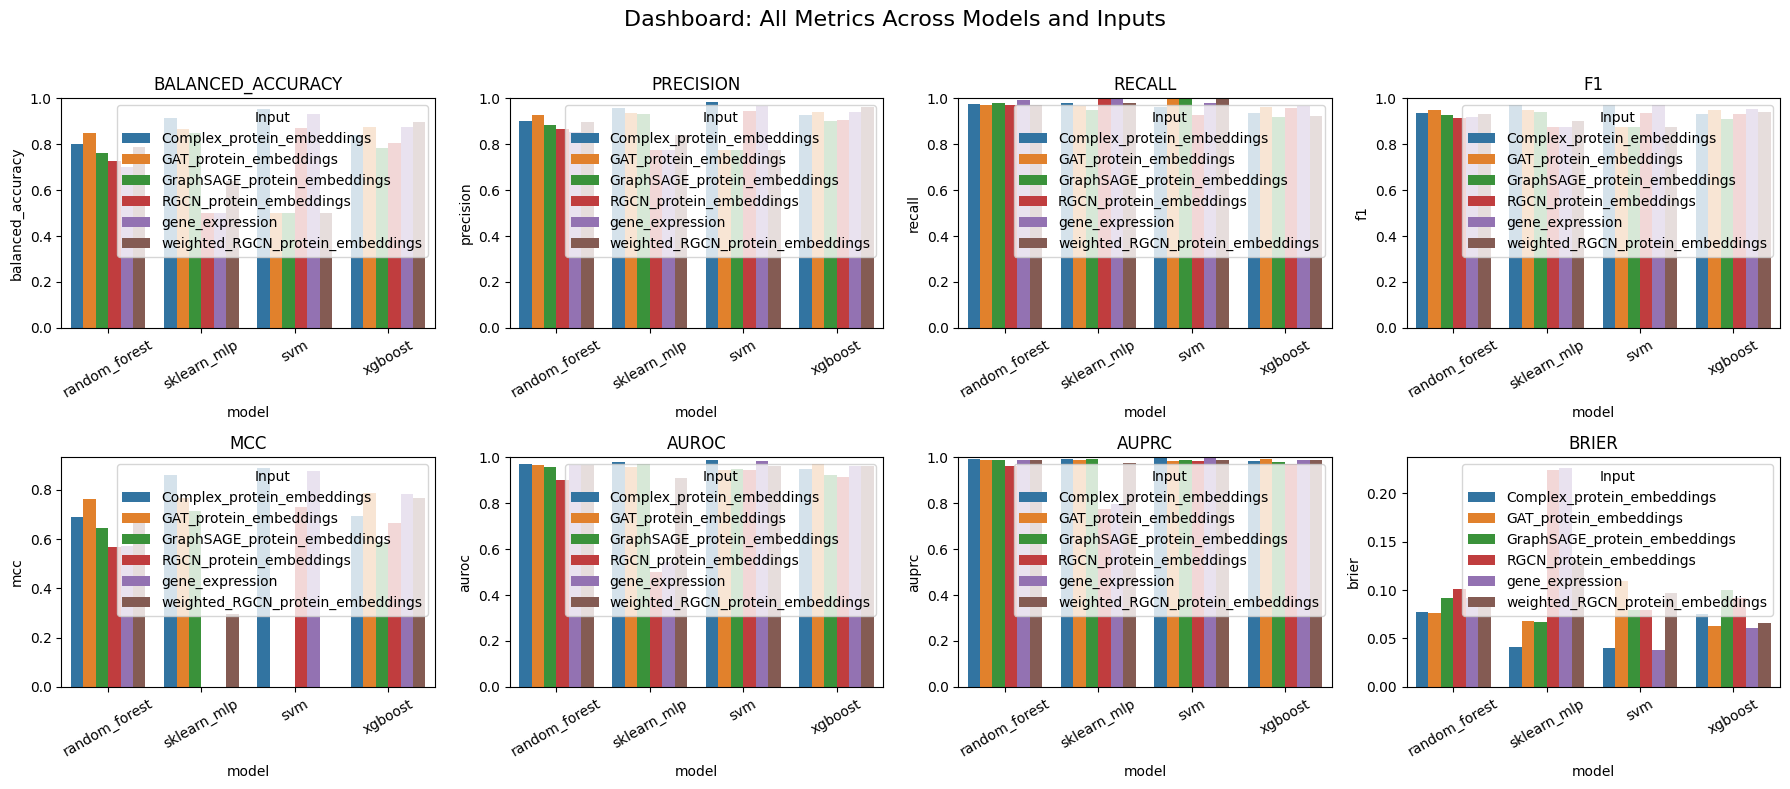

In [202]:
collector = ResultsCollector()
dashboard = DashboardVisualizer(filtered_results, collector)
dashboard.plot_metric_grid()

### 2. heatmap

model_dataset x score matrix 

In [203]:
# metric='balanced_accuracy'

In [204]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
40,random_forest,Complex_protein_embeddings,minmax,v2.11,0.801794,0.902229,0.976316,0.937127,0.691481,0.970335,0.991747,0.077445
50,random_forest,GAT_protein_embeddings,minmax,v2.11,0.849163,0.926919,0.971053,0.947129,0.763262,0.966507,0.990175,0.075870
64,random_forest,GraphSAGE_protein_embeddings,minmax,v2.11,0.763517,0.884900,0.981579,0.929543,0.643525,0.956938,0.988257,0.091781
80,random_forest,RGCN_protein_embeddings,minmax,v2.11,0.726435,0.867022,0.971053,0.915562,0.569952,0.903110,0.963238,0.100980
101,random_forest,gene_expression,none,no version,0.701914,0.853740,0.994737,0.918703,0.570990,0.967823,0.990010,0.091307
103,random_forest,weighted_RGCN_protein_embeddings,minmax,v2.11,0.790072,0.896011,0.971053,0.931387,0.675128,0.966029,0.990092,0.082063
119,sklearn_mlp,Complex_protein_embeddings,minmax,v2.11,0.913517,0.957654,0.981579,0.968879,0.860892,0.981579,0.994723,0.041194
129,sklearn_mlp,GAT_protein_embeddings,minmax,v2.11,0.864713,0.934462,0.965789,0.949459,0.767973,0.959091,0.988488,0.068107
143,sklearn_mlp,GraphSAGE_protein_embeddings,minmax,v2.11,0.850957,0.932244,0.947368,0.939182,0.715389,0.968900,0.992123,0.067452
159,sklearn_mlp,RGCN_protein_embeddings,minmax,v2.11,0.500000,0.775510,1.000000,0.873563,0.000000,0.500000,0.775510,0.223697


In [205]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'mcc', 'auroc','auprc','brier']
# filtered_results['model_input'] = filtered_results['input'] + '_' + filtered_results['model'] + '_' + filtered_results['normalization']
# heatmap_data = filtered_results[(filtered_results['input'].str.contains('sample')) | (filtered_results['input']=='gene_expression')].set_index('model_input')[metrics]

# plt.figure(figsize=(14, 10))
# sns.heatmap(heatmap_data, annot=True, cmap="viridis_r", fmt=".3f")
# plt.title("Model Performance Metrics Heatmap (sample embeddings)")
# plt.ylabel("Model_Input")
# plt.xlabel("Metrics")

# plt.yticks(rotation=0) 
# plt.tight_layout()
# plt.show()


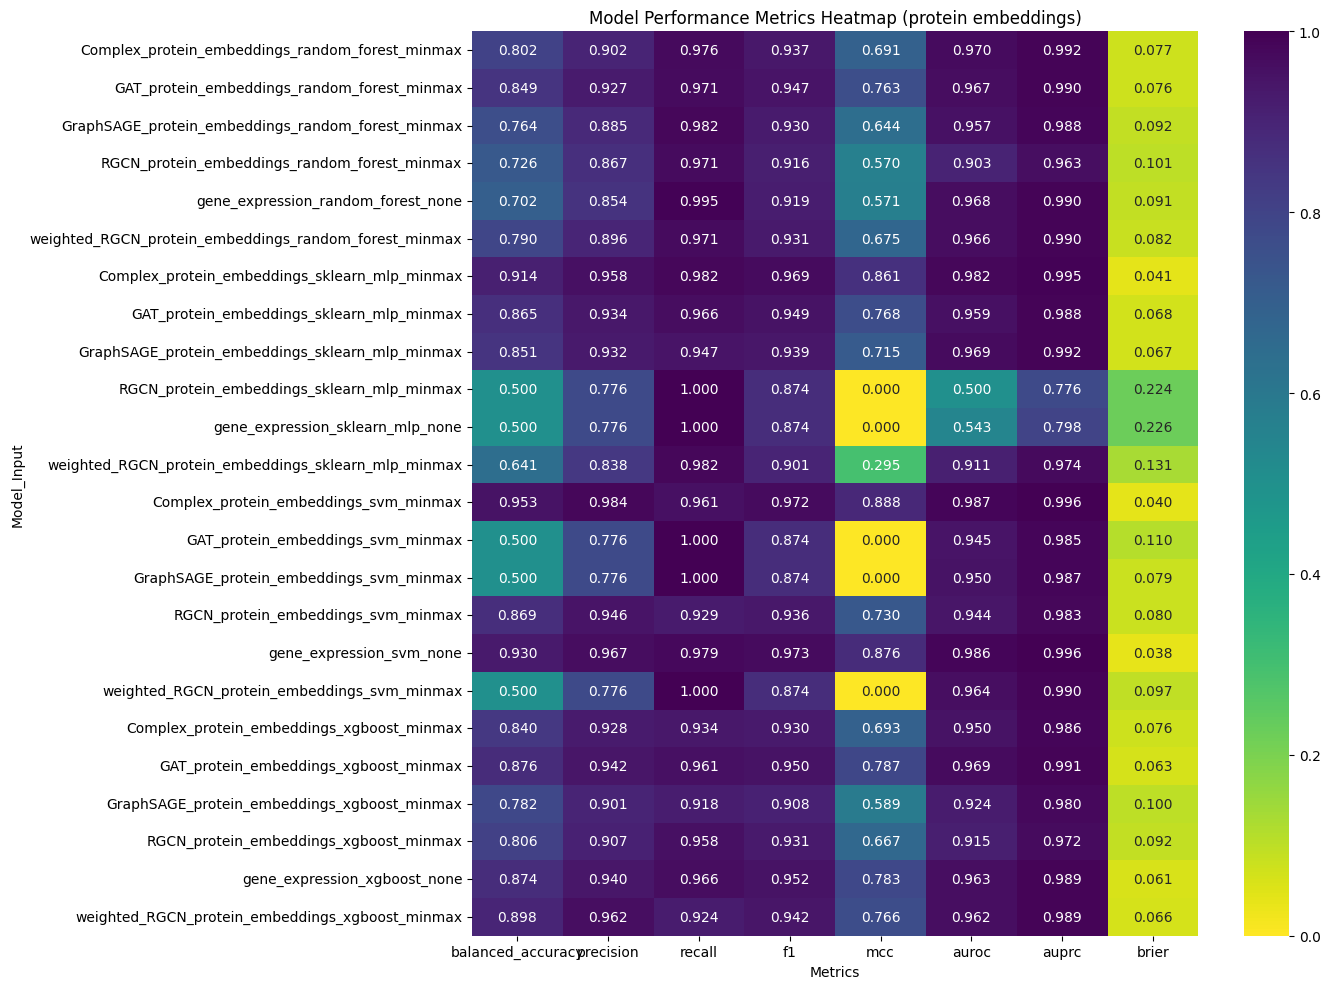

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'mcc', 'auroc','auprc','brier']
filtered_results['model_input'] = filtered_results['input'] + '_' + filtered_results['model'] + '_' + filtered_results['normalization']
heatmap_data = filtered_results[filtered_results['input'].str.contains('protein') | (filtered_results['input']=='gene_expression')].set_index('model_input')[metrics]

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap="viridis_r", fmt=".3f")
plt.title("Model Performance Metrics Heatmap (protein embeddings)")
plt.ylabel("Model_Input")
plt.xlabel("Metrics")

plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


### 3. radar plot

To be more readbale better make a radar plot per model (one for svm, one for xgboost...)

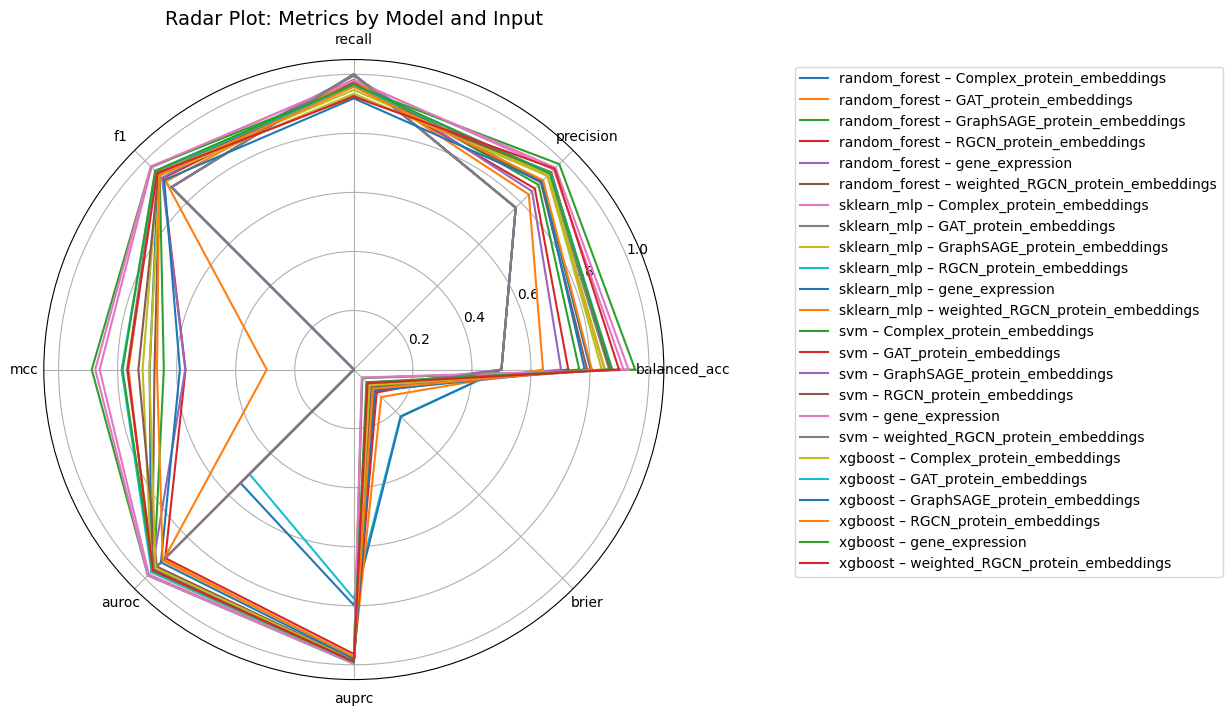

In [207]:
dashboard.plot_radar()

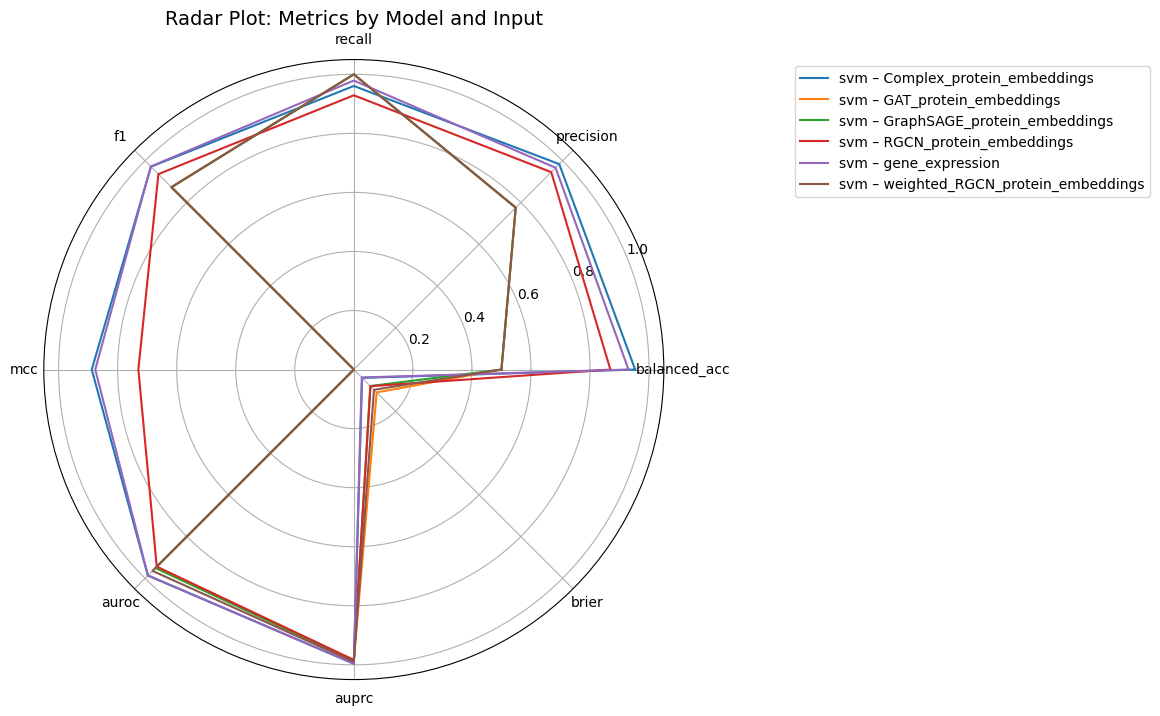

In [208]:
collector = ResultsCollector()
svm_filtered_results=filtered_results[filtered_results['model']=='svm']
dashboard = DashboardVisualizer(svm_filtered_results, collector)
dashboard.plot_radar()

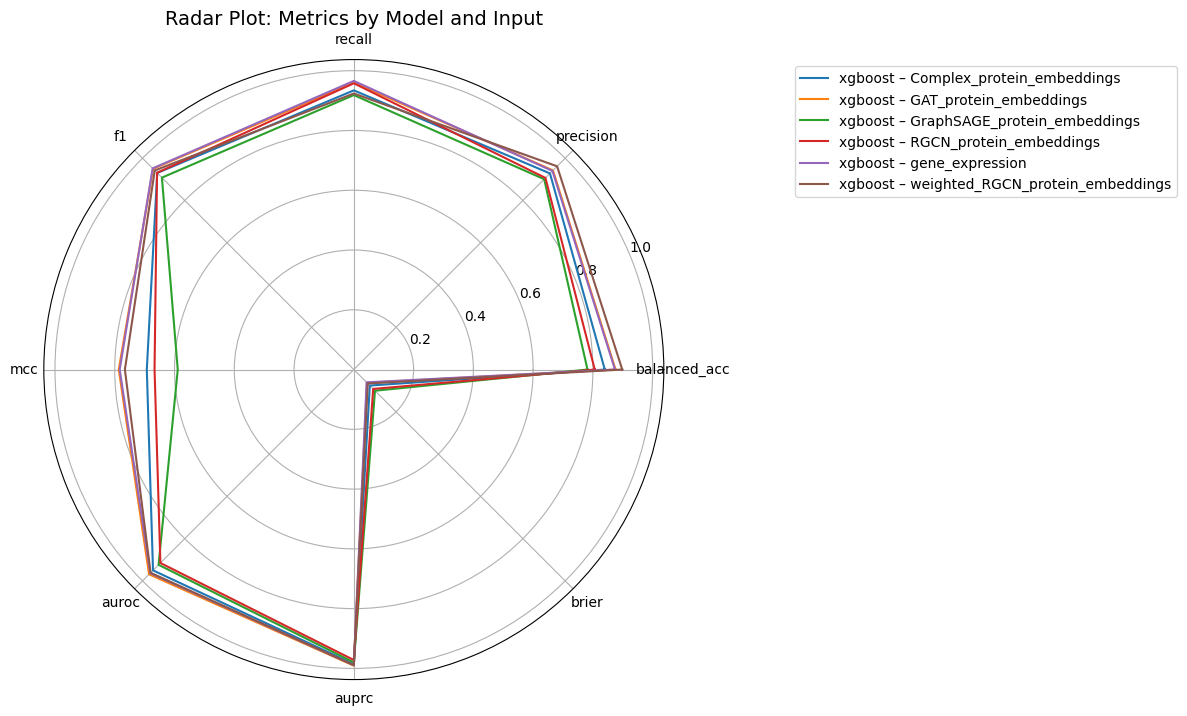

In [209]:
collector = ResultsCollector()
xgboost_filtered_results=filtered_results[filtered_results['model']=='xgboost']
dashboard = DashboardVisualizer(xgboost_filtered_results, collector)
dashboard.plot_radar()


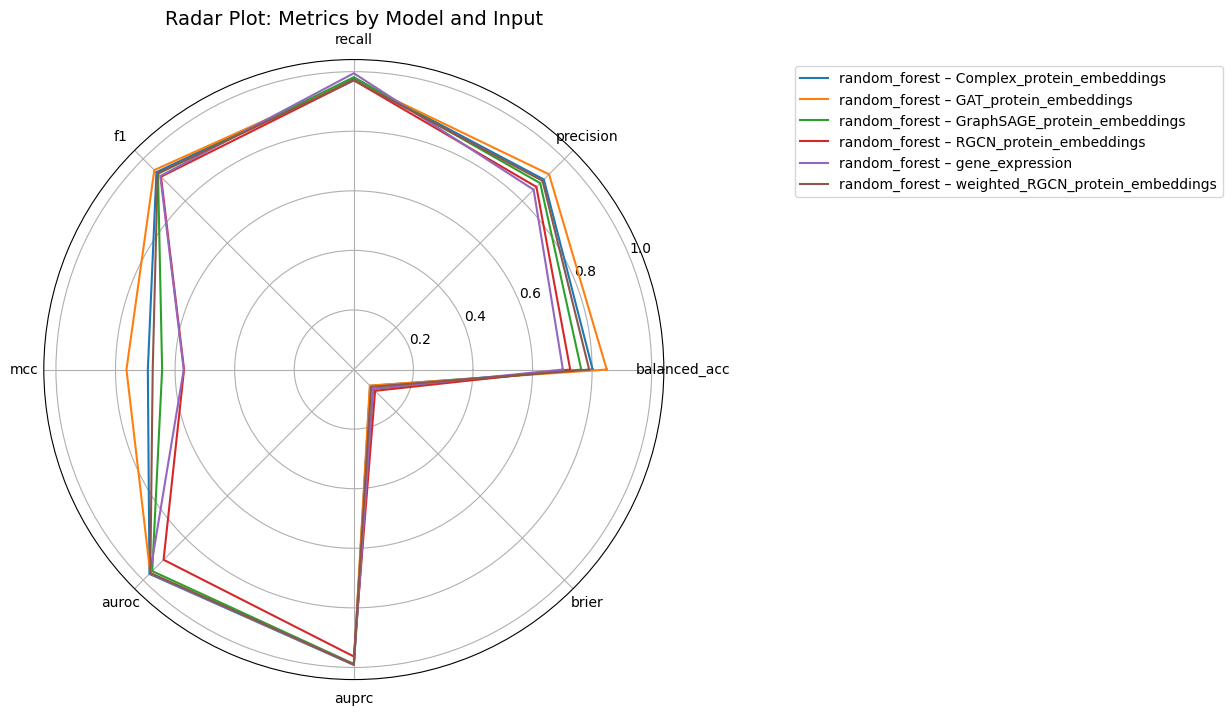

In [210]:
collector = ResultsCollector()
random_forest_filtered_results=filtered_results[filtered_results['model']=='random_forest']
dashboard = DashboardVisualizer(random_forest_filtered_results, collector)
dashboard.plot_radar()

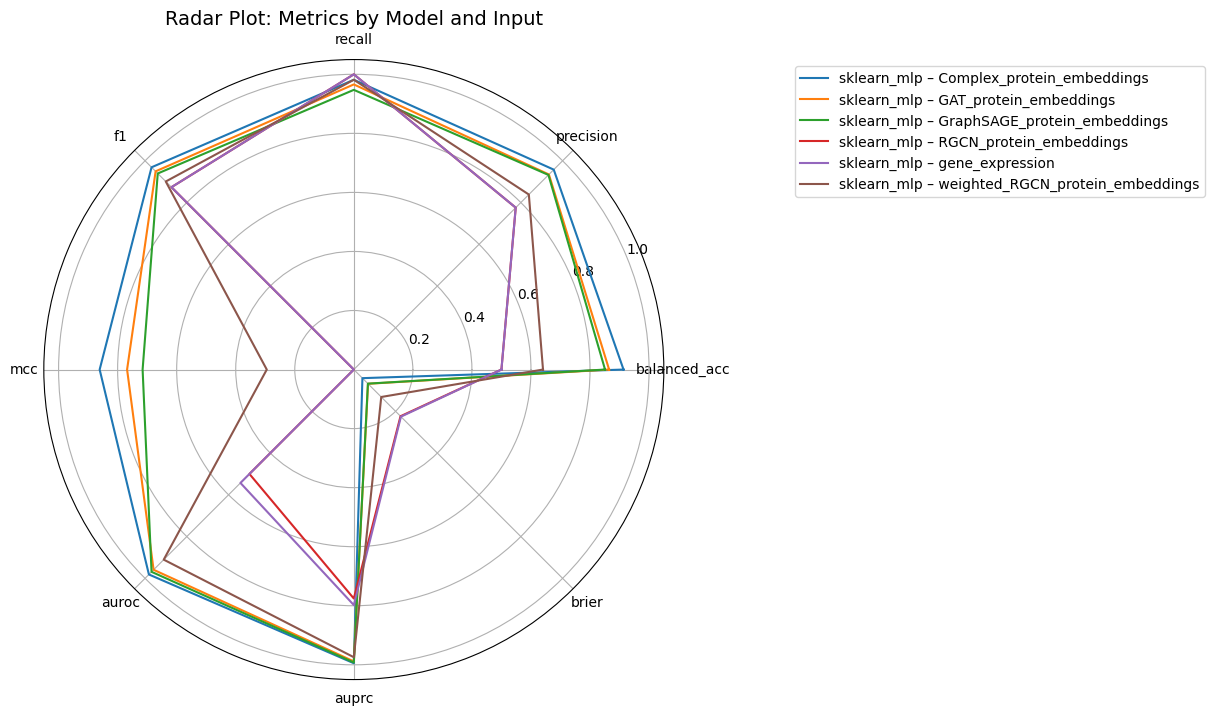

In [211]:
collector = ResultsCollector()
sklearn_mlp_filtered_results=filtered_results[filtered_results['model']=='sklearn_mlp']
dashboard = DashboardVisualizer(sklearn_mlp_filtered_results, collector)
dashboard.plot_radar()

In [212]:
# collector = ResultsCollector()
# pytorch_mlp_filtered_results=filtered_results[filtered_results['model']=='pytorch_mlp']
# dashboard = DashboardVisualizer(pytorch_mlp_filtered_results, collector)
# dashboard.plot_radar()

### 5. scatter plot

somparing 2 strong(?) models, each point is a dataset+metrix, can have shape of point by metric and color by dataset (or just for one metric for now)

In [213]:
metric='balanced_accuracy'

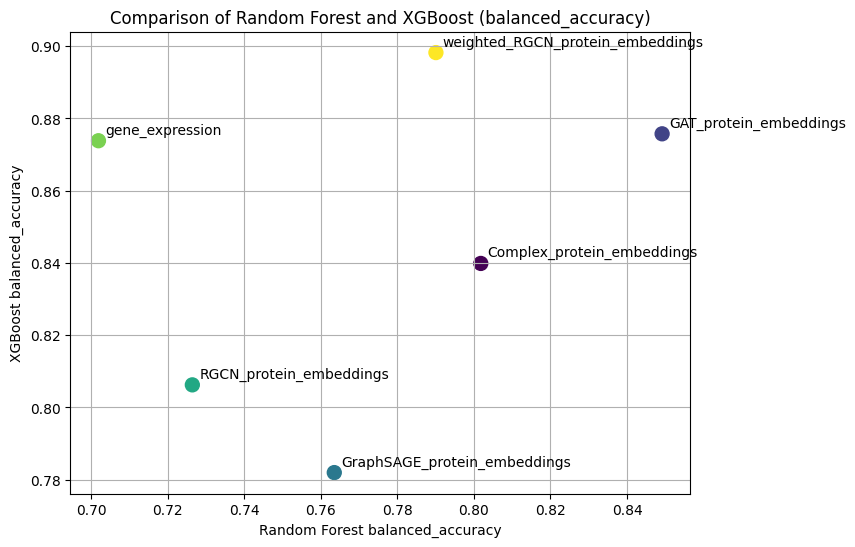

In [214]:
rf = filtered_results[filtered_results['model'] == 'random_forest'][['input', metric]]
xgb = filtered_results[filtered_results['model'] == 'xgboost'][['input', metric]]

merged = rf.merge(xgb, on='input', suffixes=('_rf', '_xgb'))

cats = merged['input'].astype('category')
codes = cats.cat.codes

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    merged[metric + '_rf'],
    merged[metric + '_xgb'],
    s=100,
    c=codes
)

for _, row in merged.iterrows():
    plt.annotate(
        row['input'],
        (row[metric + '_rf'], row[metric + '_xgb']),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left'
    )

plt.xlabel(f'Random Forest {metric}')
plt.ylabel(f'XGBoost {metric}')
plt.title(f'Comparison of Random Forest and XGBoost ({metric})')
plt.grid()



plt.show()




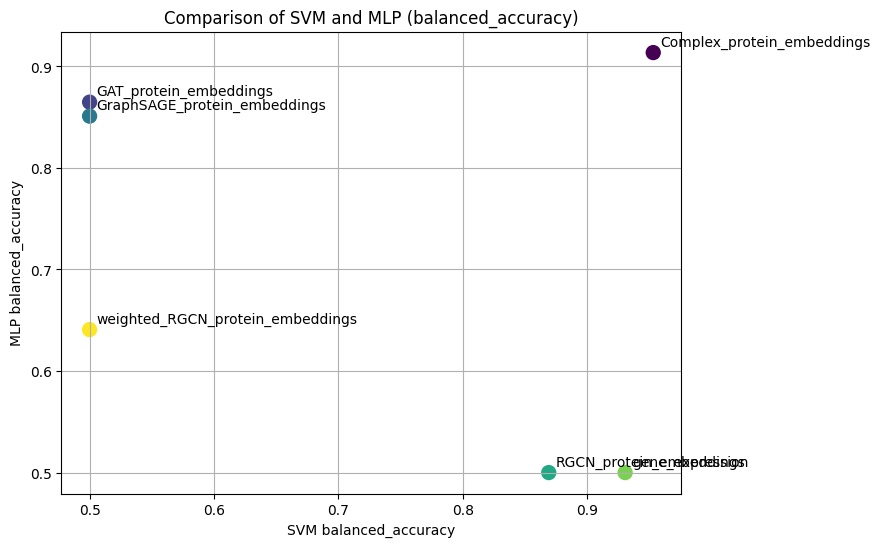

In [217]:
# -- for svm and mlp because they tend to give complementary results
svm = filtered_results[filtered_results['model'] == 'svm'][['input', metric]]
mlp = filtered_results[filtered_results['model'] == 'sklearn_mlp'][['input', metric]]

merged = svm.merge(mlp, on='input', suffixes=('_svm', '_mlp'))
cats = merged['input'].astype('category')
codes = cats.cat.codes
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    merged[metric + '_svm'],
    merged[metric + '_mlp'],
    s=100,
    c=codes
)
for _, row in merged.iterrows():
    plt.annotate(
        row['input'],
        (row[metric + '_svm'], row[metric + '_mlp']),
        textcoords="offset points",
        xytext=(5, 5),
        ha='left'
    )
plt.xlabel(f'SVM {metric}')
plt.ylabel(f'MLP {metric}')
plt.title(f'Comparison of SVM and MLP ({metric})')
plt.grid()
plt.show()

### 6. rank dist plot
showing the rank distribution of models over datasets for a given metric

In [215]:
metric='balanced_accuracy'

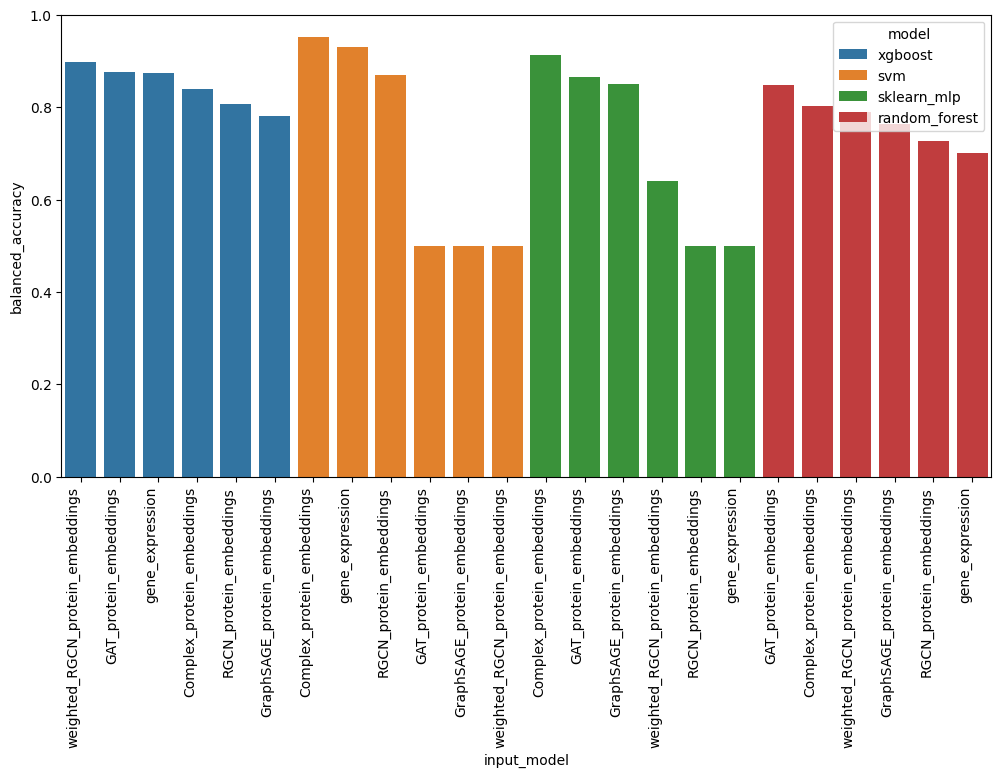

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- df sorted by model then by metric
sorted_df=filtered_results.sort_values(by=['model', metric],ascending=False)
sorted_df['input_model']=sorted_df['input']+'_'+sorted_df['model']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_df, x='input_model', y=metric, hue='model', dodge=False, palette='tab10')

ax.set_xticks(range(len(sorted_df)))
ax.set_xticklabels(sorted_df['input'], rotation=90, ha='right', fontsize=10)

# # bar plot and color by model
# plt.figure(figsize=(12, 6))
# sns.barplot(data=sorted_df, x='input_model', y=metric,hue='model')
# plt.title(f'Model Performance by {metric.capitalize()}')
# plt.xlabel('trained model')
# plt.ylabel(metric.capitalize())
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.legend(title='Model')
# plt.tight_layout()
plt.show()